# Titanic Survived Project

# Importing all required libraries

In [2]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
%matplotlib inline
import scipy.stats as stats
from scipy import stats
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score,recall_score, f1_score
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.svm import SVC
from xgboost import XGBClassifier
from scipy.stats import skew
from imblearn.over_sampling import SMOTE
import pickle

In [3]:
#Loading the Dataset

df=pd.read_csv('titanic.csv')

df    #calling here

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
#NOT RENAMING THE COLUMN HEADERS, ALL ARE GOOD FOR ANALYSIS

In [5]:
#Rows and columns 
print('Number of rows:', df.shape[0]," ",'Number of columns:', df.shape[1]) 

Number of rows: 891   Number of columns: 12


In [6]:
df.head(5)   #first 5 sample

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
df.tail(5)   #Last 5 sample

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [8]:
df.sample(5)  # Random 5 Sample

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
589,590,0,3,"Murdlin, Mr. Joseph",male,NaN,0,0,A./5. 3235,8.0500,NaN,S
711,712,0,1,"Klaber, Mr. Herman",male,NaN,0,0,113028,26.5500,C124,S
638,639,0,3,"Panula, Mrs. Juha (Maria Emilia Ojala)",female,41.0,0,5,3101295,39.6875,NaN,S
666,667,0,2,"Butler, Mr. Reginald Fenton",male,25.0,0,0,234686,13.0000,NaN,S
528,529,0,3,"Salonen, Mr. Johan Werner",male,39.0,0,0,3101296,7.9250,NaN,S


# Exploratory data Analysis (EDA)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Observation:
    
1. There are 3 different Data types in Data set (int,Float,object)

2. Seems Data Set is having some Null Values

In [10]:
#Checking for the NULL Values

df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Observation:
    
1. Cabin and Age is having higher side of null values and Cabin is on more side with 687 Null values

2. Embarked is also having 2 Null values

In [11]:
#Dropping the Passenger ID, Name and Ticket as it doesnt effect the prediction
#Dropping Cabin column which is having more NUll Values in DATA set

In [12]:
#Dropping the columns

df.drop(columns=['Cabin','PassengerId'],inplace=True)

In [13]:
df.drop(columns=['Name','Ticket'],inplace=True)

In [14]:
#Fill the Null values 

#For AGE column
df['Age'].fillna(df['Age'].mean(),inplace=True)

In [15]:
#For Embarked Column
df['Embarked'].fillna(df['Embarked'].mode(),inplace=True)

In [16]:
#Describing data Set

df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Observation:
    
1. Survived : the means Survived is 0.383838
    
2. Pclass : Class is from 1 to 3 and mean class is 2.3086942
    
3. Age: Age is from 0.42 to 80 and mean aged people are 29.69118
    
4. Fare is from 0 to 512.329200 with mean fare of 32.204208

In [17]:
#Value Counts of Sibsp and parch
df['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [18]:
df['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

Out of 891: 62 people died in the accident


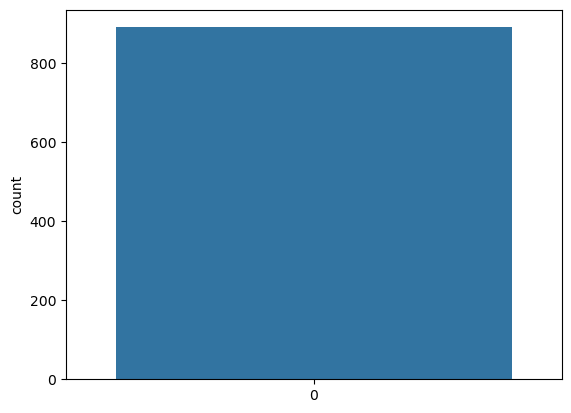

In [19]:
#Univariate Analysis

# Start with the Survived Column
sns.countplot(df['Survived'])

death_percent=round((df['Survived'].value_counts().values[0]/891)*100)

print("Out of 891: {} people died in the accident".format(death_percent))

In [20]:
# Pclass column

print((df['Pclass'].value_counts()/891)*100)


3    55.106622
1    24.242424
2    20.650954
Name: Pclass, dtype: float64


In [21]:
# Sex Column

print((df['Sex'].value_counts()/891)*100)

male      64.758698
female    35.241302
Name: Sex, dtype: float64


<Axes: xlabel='Age', ylabel='Count'>

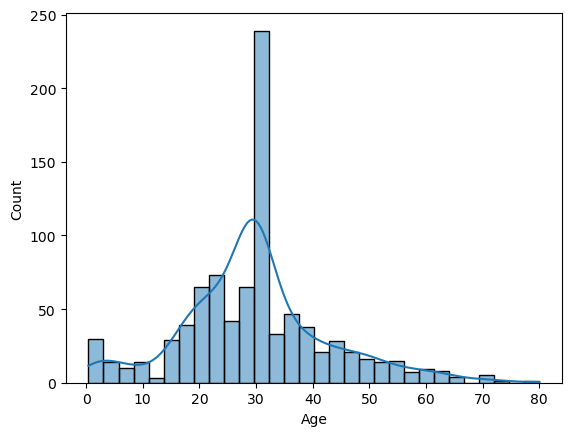

In [22]:
# Age Column
sns.histplot(df.Age,kde=True)

In [23]:
#Sibsp Column

print(df['SibSp'].value_counts())

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64


In [24]:
#Parch Column

print((df['Parch'].value_counts()/891)*100)

0    76.094276
1    13.243547
2     8.978676
5     0.561167
3     0.561167
4     0.448934
6     0.112233
Name: Parch, dtype: float64


In [25]:
#Embarked Column

print((df['Embarked'].value_counts()/891)*100)

S    72.278339
C    18.855219
Q     8.641975
Name: Embarked, dtype: float64


0.4344880940129925
0.9662793026645233


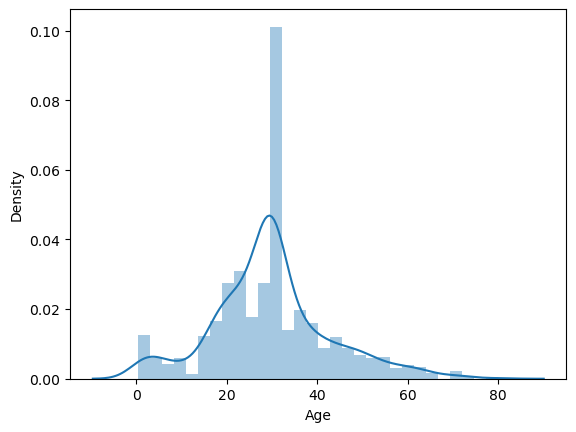

In [26]:
# Age column

sns.distplot(df['Age'])

print(df['Age'].skew())

print(df['Age'].kurt())

Observation:
    
1.Based on skewness and kurtosis values, the 'Age' distribution appears to be slightly positively skewed and has heavier tails compared to normal distribution.


<Axes: >

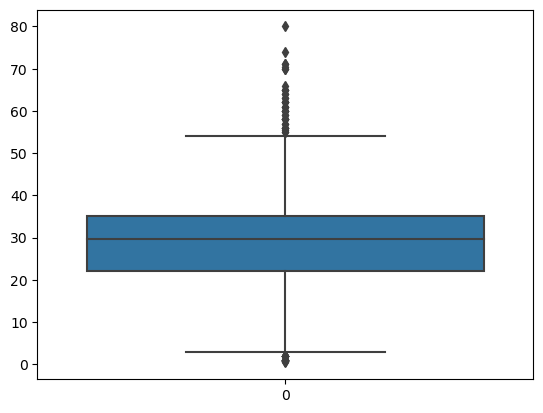

In [27]:
sns.boxplot(df['Age'])

<Axes: xlabel='Fare', ylabel='Density'>

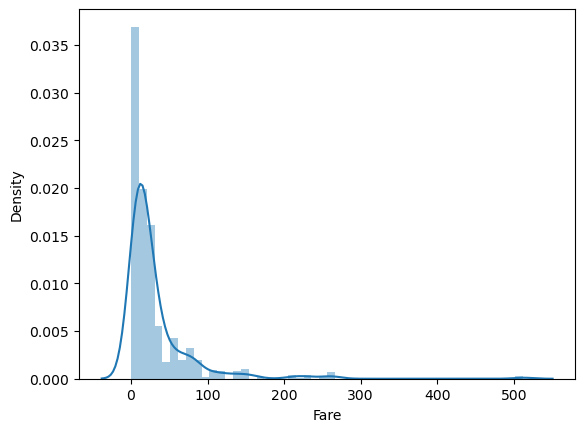

In [28]:
# Fare column

sns.distplot(df['Fare'])

In [29]:
#Skewness and Kurtosis for fare

print(df['Fare'].skew())
print(df['Fare'].kurt())

4.787316519674893
33.39814088089868


Observation:
    
    
1.based on the skewness and kurtosis values, the 'Fare' distribution is highly positively skewed with a long right tail and has extremely heavy tails compared to a normal distribution.


<Axes: >

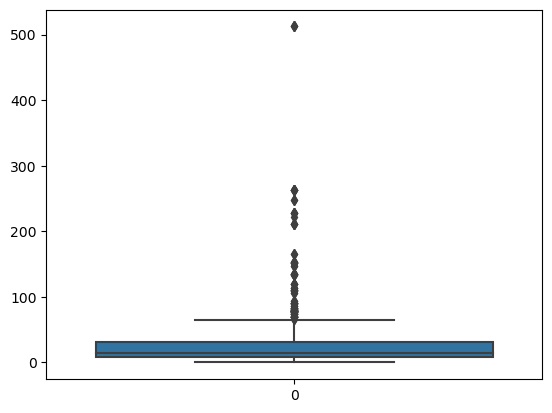

In [30]:
sns.boxplot(df['Fare'])


In [31]:
print("People with fare in between $100 & $200","=",df[(df['Fare']>100) & (df['Fare']<200)].shape[0])
print("People with fare in greater than $200","=",df[df['Fare']>200].shape[0])


People with fare in between $100 & $200 = 33
People with fare in greater than $200 = 20


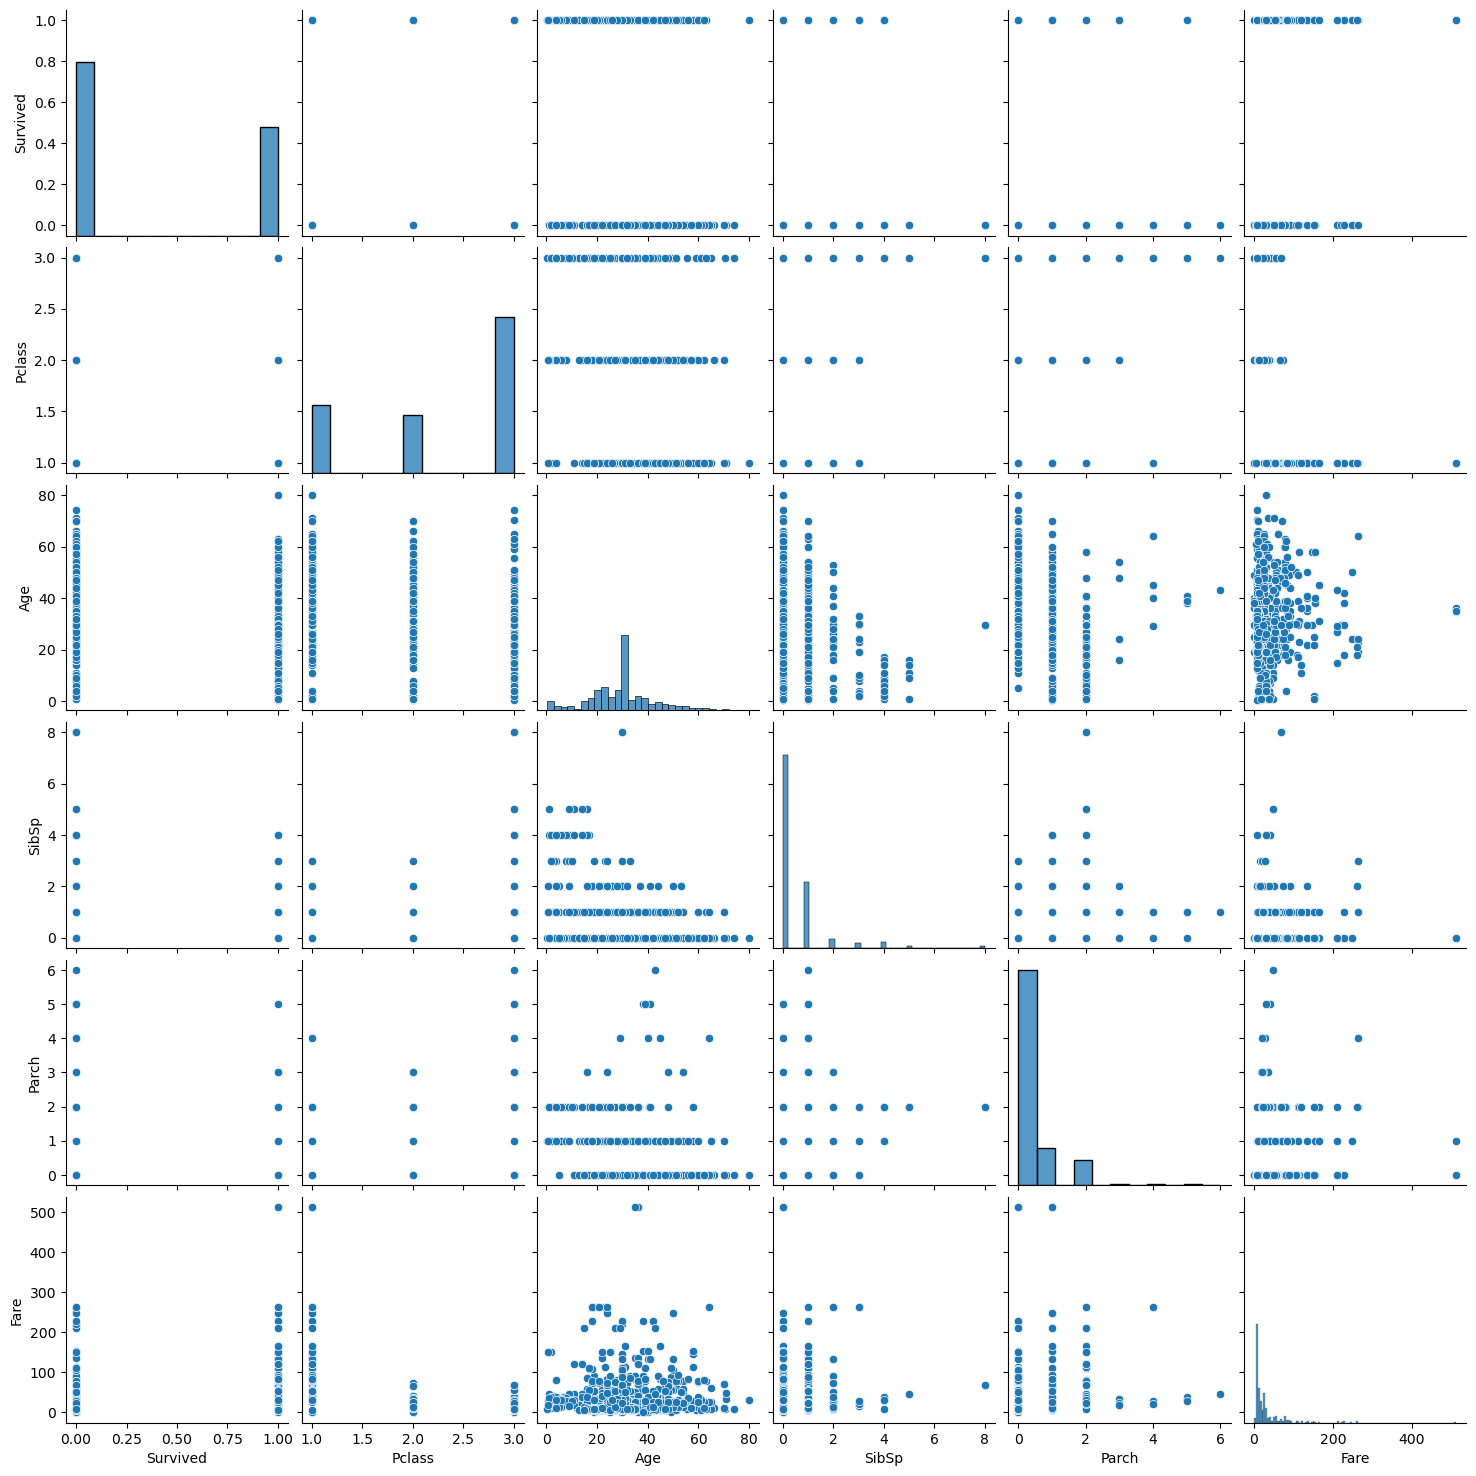

In [33]:
sns.pairplot(df)

<Axes: xlabel='Fare', ylabel='Density'>

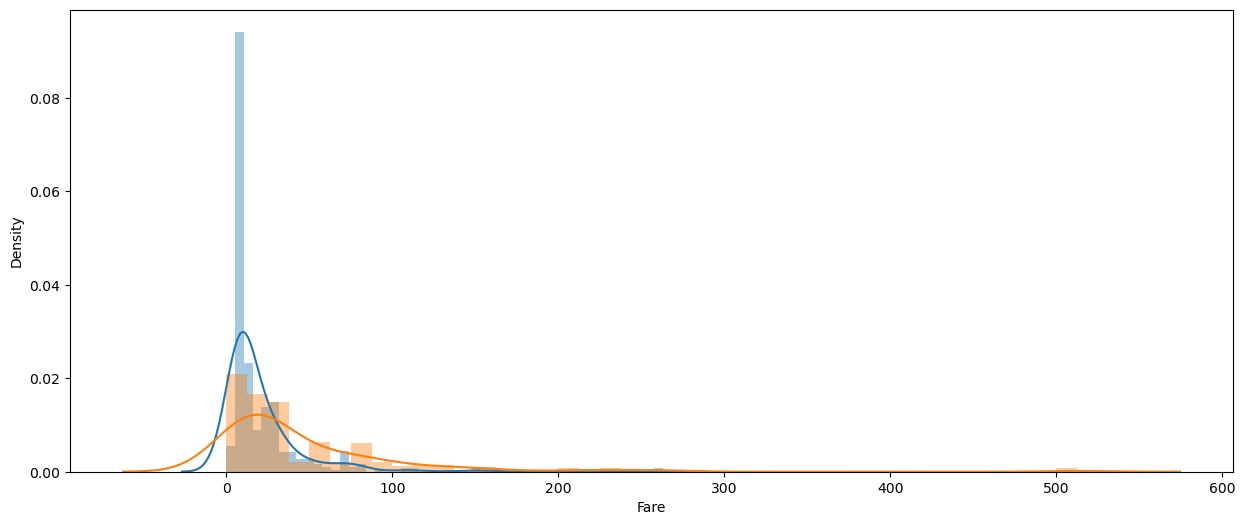

In [34]:
# Survived with Fare

plt.figure(figsize=(15,6))
sns.distplot(df[df['Survived']==0]['Fare'])
sns.distplot(df[df['Survived']==1]['Fare'])

<Axes: xlabel='Age', ylabel='Density'>

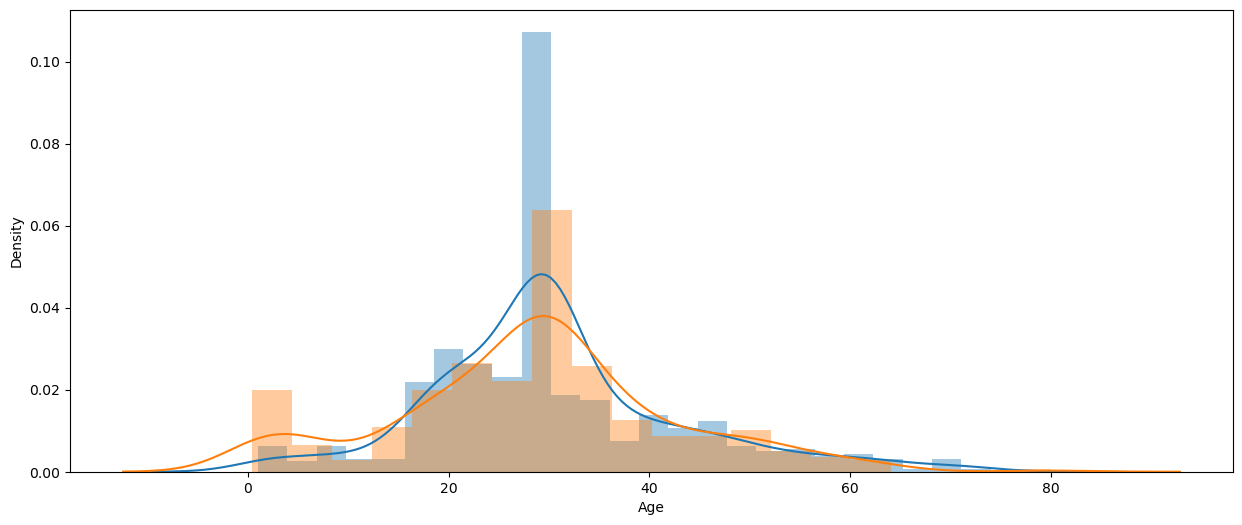

In [35]:
# Survived with Age

plt.figure(figsize=(15,6))
sns.distplot(df[df['Survived']==0]['Age'])
sns.distplot(df[df['Survived']==1]['Age'])

<Axes: >

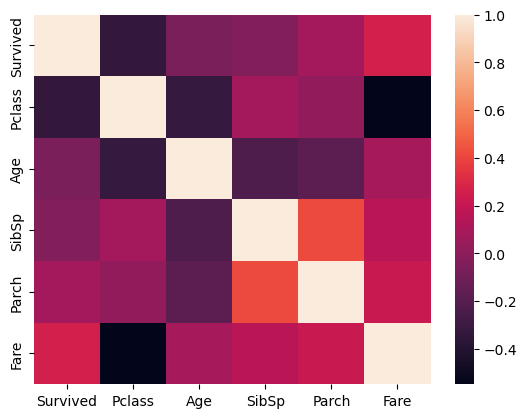

In [36]:
sns.heatmap(df.corr())

In [37]:
#Feature Engineering


# We will create a new column by the name of family which will be the sum of SibSp and Parch cols

df['family_size']=df['Parch'] + df['SibSp']

In [38]:
df.sample(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,family_size
116,0,3,male,70.500000,0,0,7.7500,Q,0
796,1,1,female,49.000000,0,0,25.9292,S,0
72,0,2,male,21.000000,0,0,73.5000,S,0
324,0,3,male,29.699118,8,2,69.5500,S,10
459,0,3,male,29.699118,0,0,7.7500,Q,0


In [39]:
# Now we will enginner a new feature by the name of family type

def family_type(number):
    if number==0:
        return "Alone"
    elif number>0 and number<=4:
        return "Medium"
    else:
        return "Large"

In [40]:
df['family_type']=df['family_size'].apply(family_type)

In [41]:
df.sample(5)


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,family_size,family_type
43,1,2,female,3.000000,1,2,41.5792,C,3,Medium
188,0,3,male,40.000000,1,1,15.5000,Q,2,Medium
490,0,3,male,29.699118,1,0,19.9667,S,1,Medium
452,0,1,male,30.000000,0,0,27.7500,C,0,Alone
163,0,3,male,17.000000,0,0,8.6625,S,0,Alone


In [ ]:
# Dropping SibSp, Parch and family_size

df.drop(columns=['SibSp','Parch','family_size'],inplace=True)

In [44]:
df.sample(5)

,Survived,Pclass,Sex,Age,Fare,Embarked,family_type
135,0,2,male,23.000000,15.0458,C,Alone
680,0,3,female,29.699118,8.1375,Q,Alone
854,0,2,female,44.000000,26.0000,S,Medium
495,0,3,male,29.699118,14.4583,C,Alone
92,0,1,male,46.000000,61.1750,S,Medium


In [45]:
pd.crosstab(df['family_type'], df['Survived']).apply(lambda r: round((r/r.sum())*100,1), axis=1)


Survived,0,1
family_type,,
Alone,69.6,30.4
Large,85.1,14.9
Medium,44.0,56.0


Observations from the crosstab:

Alone: Among the passengers who were alone (without any family members onboard), approximately 30.4% survived, while 69.6% did not survive.

Large: For passengers who were part of large families, approximately 14.9% survived, while 85.1% did not survive.

Medium: Among the passengers who were part of medium-sized families, approximately 56.0% survived, while 44.0% did not survive.

Detecting outliers
Numerical Data
if the data is following normal distribution, anything beyond 3SD - mean + 3SD can be considered as an outlier
if the data does not follow normal distribution, using boxplot we can eliminate points beyond Q1 - 1.5 * IQR and Q3 + 1.5 * IQR
Categorical data
If the col is highly imbalnced for eg male 10000 and female 2 then we can eliminate female


In [46]:
# handling outliers in age(Almost normal)

df=df[df['Age']<(df['Age'].mean() + 3 * df['Age'].std())]
df.shape

(884, 7)

In [47]:
# handling outliers from Fare column

# Finding quartiles

Q1= np.percentile(df['Fare'],25)
Q3= np.percentile(df['Fare'],75)

outlier_low=Q1 - 1.5 * (Q3 - Q1)
outlier_high=Q3 + 1.5 * (Q3 - Q1)

df=df[(df['Fare']>outlier_low) & (df['Fare']<outlier_high)]

In [48]:
df.sample(4)

,Survived,Pclass,Sex,Age,Fare,Embarked,family_type
113,0,3,female,20.000000,9.8250,S,Medium
154,0,3,male,29.699118,7.3125,S,Alone
331,0,1,male,45.500000,28.5000,S,Alone
828,1,3,male,29.699118,7.7500,Q,Alone


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 769 entries, 0 to 890
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Survived     769 non-null    int64  
 1   Pclass       769 non-null    int64  
 2   Sex          769 non-null    object 
 3   Age          769 non-null    float64
 4   Fare         769 non-null    float64
 5   Embarked     769 non-null    object 
 6   family_type  769 non-null    object 
dtypes: float64(2), int64(2), object(3)
memory usage: 48.1+ KB


In [50]:
#Datatype Changes

df['Survived']=df['Survived'].astype('int32')
df['Pclass']=df['Pclass'].astype('int32')
df['Sex']=df['Sex'].astype('object')
df['Age']=df['Age'].astype('int32')
df['Embarked']=df['Embarked'].astype('object')

# Encoding Categorial Changes

In [51]:
df=pd.get_dummies(data=df, columns=['Sex','Embarked','family_type'], drop_first=True)


<Axes: >

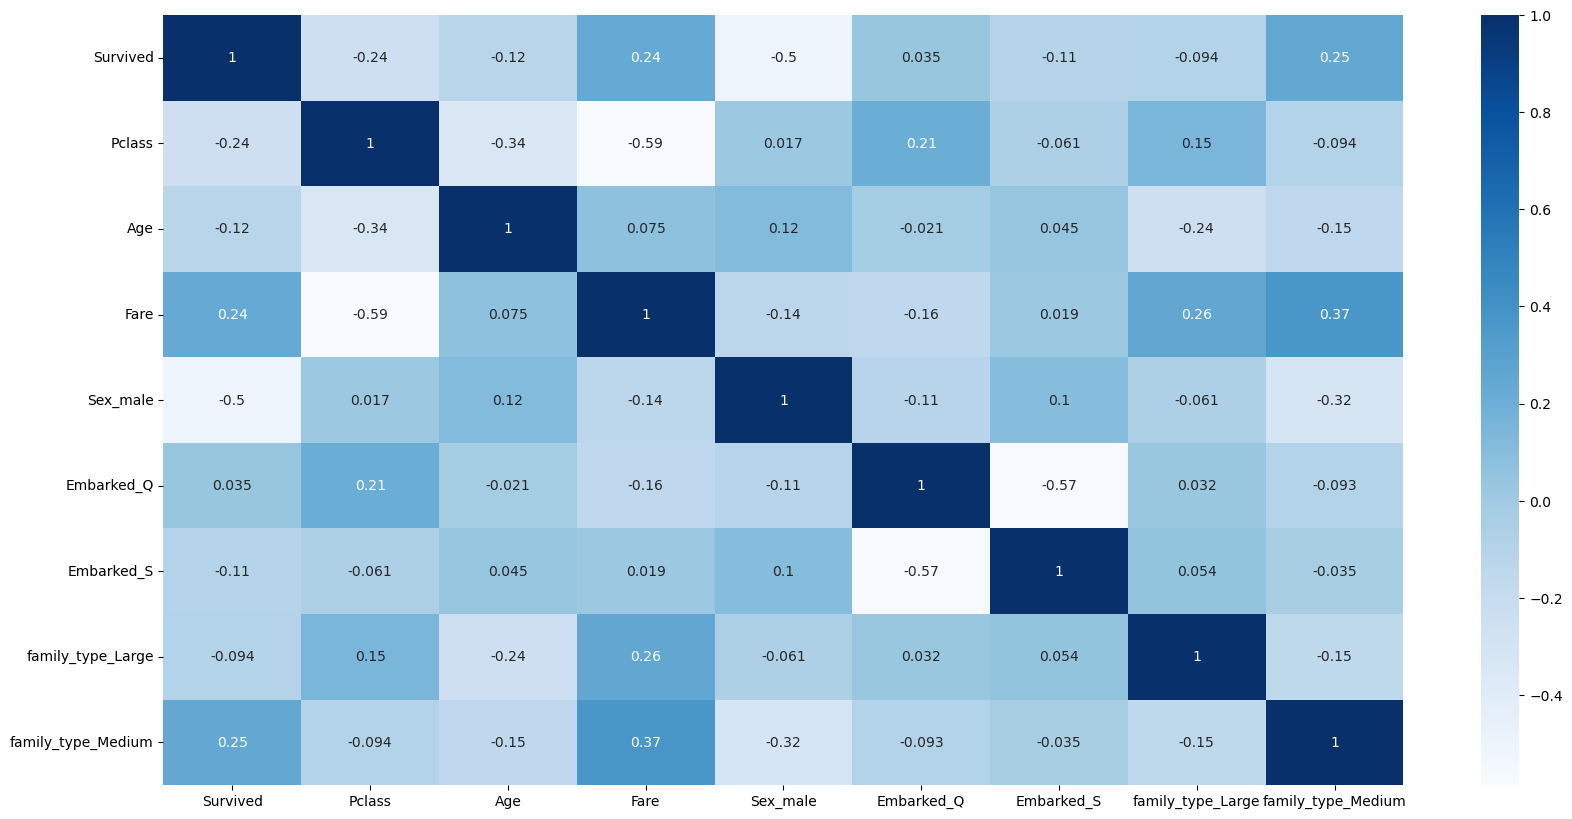

In [65]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True, cmap='Blues')

In [55]:
df['Survived'].value_counts()

0    507
1    262
Name: Survived, dtype: int64

Observation:

data is looking imbalanced there are 0 = 507 & 1 = 262

In [56]:
#Scaling data Using StandardScaler


scaler = StandardScaler()
features_to_scale =['Pclass','Age','Fare']
scaled_features = scaler.fit_transform(df[features_to_scale])
scaled_df = df.copy()
scaled_df[features_to_scale] = scaled_features

In [57]:
scaled_df

,Survived,Pclass,Age,Fare,Sex_male,Embarked_Q,Embarked_S,family_type_Large,family_type_Medium
0,0,0.705178,-0.540039,-0.777547,1,0,1,0,1
2,1,0.705178,-0.212717,-0.727699,0,0,1,0,0
3,1,-2.033619,0.523758,2.608437,0,0,1,0,1
4,0,0.705178,0.523758,-0.718468,1,0,1,0,0
5,0,0.705178,0.032775,-0.688315,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...
886,0,-0.664221,-0.130886,-0.352914,1,0,1,0,0
887,1,-2.033619,-0.785531,0.902522,0,0,1,0,0
888,0,0.705178,0.032775,0.418810,0,0,1,0,1
889,1,-2.033619,-0.212717,0.902522,1,0,0,0,0


In [59]:
#Deviding into Feature and Label

X = scaled_df.drop('Survived', axis = 1)
y = scaled_df['Survived']

In [60]:
#Data Balancing Using SMOTE

smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)

In [61]:
y_resampled.value_counts()   #Data is balanced

0    507
1    507
Name: Survived, dtype: int64

# Train Test Split

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, stratify = y_resampled, random_state=42)

Logistic Regression with Hyperparameter Tuning:
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.79      0.79       102
           1       0.79      0.78      0.79       101

    accuracy                           0.79       203
   macro avg       0.79      0.79      0.79       203
weighted avg       0.79      0.79      0.79       203

Cross-Validation Scores: [0.79220779 0.77272727 0.76623377 0.80519481 0.80392157]
Mean Cross-Validation Score: 0.7880570409982175


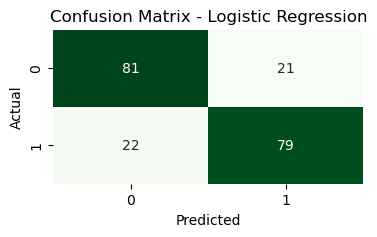

In [64]:
#Model Training
#Logistic Regression with Hyperparameter Tuning


# Define the parameter grid

param_grid = {
    'C': [0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

# Create the Logistic Regression Classifier
LG = LogisticRegression()

# Create the grid search object
grid_search = GridSearchCV(LG, param_grid, cv=5)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Create the Logistic Regression Classifier with the best parameters
best_LG = LogisticRegression(**best_params)

# Fit the model on the training data
best_LG.fit(X_train, y_train)

# Make predictions on the test set
LG_y_pred = best_LG.predict(X_test)

print("Logistic Regression with Hyperparameter Tuning:")
# Classification Report
print("Classification Report:")
print(classification_report(y_test, LG_y_pred))

# Cross-Validation Score
scores = cross_val_score(best_LG, X, y, cv=5)
print("Cross-Validation Scores:", scores)
mean_score = scores.mean()
print("Mean Cross-Validation Score:", mean_score)

# Plot confusion matrix as a heatmap
cm = confusion_matrix(y_test, LG_y_pred)
plt.figure(figsize=(4, 2))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens", cbar=False)
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

ROC AUC Score: 0.846000776548243


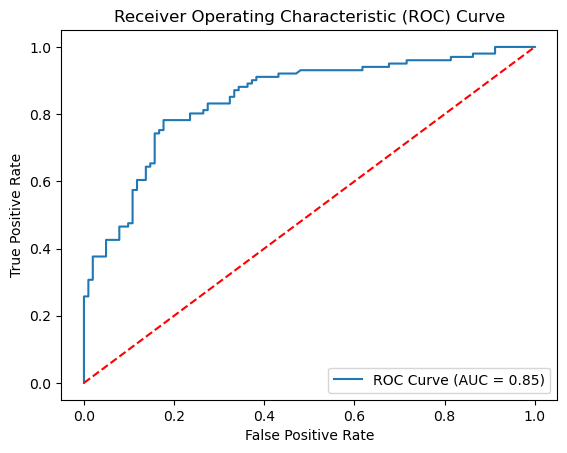

In [66]:
#ROC AUC Curve

y_prob = best_LG.predict_proba(X_test)[:, 1]
auc_score = roc_auc_score(y_test, y_prob)
print("ROC AUC Score:", auc_score)
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(auc_score))
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

Decision Tree Classifier with Hyperparameter Tuning:
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.88      0.83       102
           1       0.86      0.74      0.80       101

    accuracy                           0.81       203
   macro avg       0.82      0.81      0.81       203
weighted avg       0.82      0.81      0.81       203

Cross-Validation Scores: [0.75324675 0.73376623 0.84415584 0.7987013  0.80392157]
Mean Cross-Validation Score: 0.7867583396995161


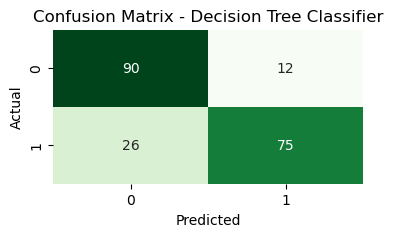

In [67]:
#Decision Tree Classifier with Hyperparameter Tuning

# Define the parameter grid
param_grid = {
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

# Create the Decision Tree Classifier
dt = DecisionTreeClassifier()

# Create the grid search object
grid_search = GridSearchCV(dt, param_grid, cv=5)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Create the Decision Tree Classifier with the best parameters
best_dt = DecisionTreeClassifier(**best_params)

# Fit the model on the training data
best_dt.fit(X_train, y_train)

# Make predictions on the test set
dt_y_pred = best_dt.predict(X_test)

print("Decision Tree Classifier with Hyperparameter Tuning:")
# Classification Report
print("Classification Report:")
print(classification_report(y_test, dt_y_pred))

# Cross-Validation Score
scores = cross_val_score(best_dt, X, y, cv=5)
print("Cross-Validation Scores:", scores)
mean_score = scores.mean()
print("Mean Cross-Validation Score:", mean_score)

# Plot confusion matrix as a heatmap
cm = confusion_matrix(y_test, dt_y_pred)
plt.figure(figsize=(4, 2))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens", cbar=False)
plt.title("Confusion Matrix - Decision Tree Classifier")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


ROC AUC Score: 0.8100854203067366


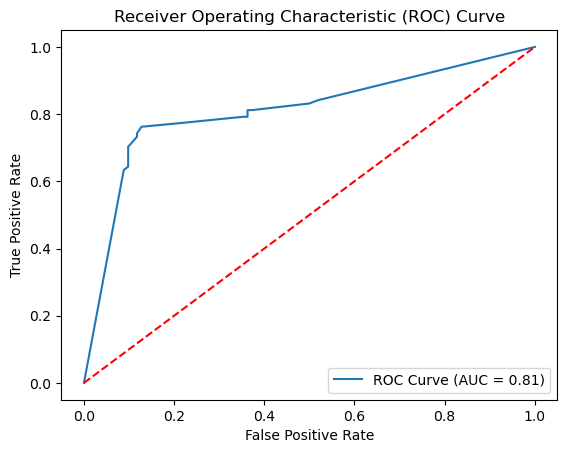

In [68]:
#ROC AUC Curve

y_prob = best_dt.predict_proba(X_test)[:, 1]
auc_score = roc_auc_score(y_test, y_prob)
print("ROC AUC Score:", auc_score)
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(auc_score))
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

Random Forest Classifier with Hyperparameter Tuning:
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.84      0.83       102
           1       0.84      0.81      0.82       101

    accuracy                           0.83       203
   macro avg       0.83      0.83      0.83       203
weighted avg       0.83      0.83      0.83       203

Cross-Validation Scores: [0.77922078 0.77922078 0.87012987 0.83116883 0.8496732 ]
Mean Cross-Validation Score: 0.8218826924709278


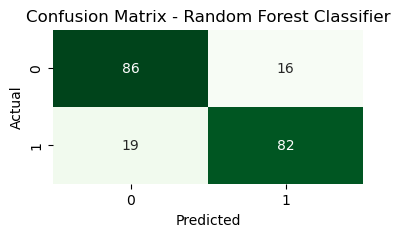

In [70]:
#Random Forest Classifier with Hyperparameter Tuning

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

# Create the Random Forest Classifier
RF = RandomForestClassifier()

# Create the grid search object
grid_search = GridSearchCV(RF, param_grid, cv=5)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Create the Random Forest Classifier with the best parameters
best_RF = RandomForestClassifier(**best_params)

# Fit the model on the training data
best_RF.fit(X_train, y_train)

# Make predictions on the test set
RF_y_pred = best_RF.predict(X_test)

print("Random Forest Classifier with Hyperparameter Tuning:")
# Classification Report
print("Classification Report:")
print(classification_report(y_test, RF_y_pred))


# Cross-Validation Score
scores = cross_val_score(best_RF, X, y, cv=5)
print("Cross-Validation Scores:", scores)
mean_score = scores.mean()
print("Mean Cross-Validation Score:", mean_score)

# Plot confusion matrix as a heatmap
cm = confusion_matrix(y_test, RF_y_pred)
plt.figure(figsize=(4, 2))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens", cbar=False)
plt.title("Confusion Matrix - Random Forest Classifier")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

ROC AUC Score: 0.8980780430984274


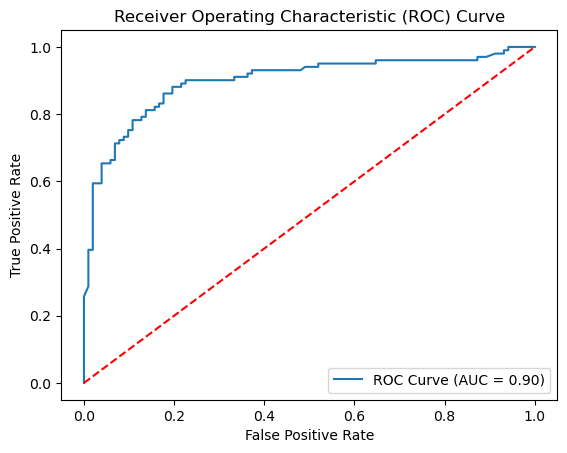

In [71]:
#ROC AUC Curve

y_prob = best_RF.predict_proba(X_test)[:, 1]
auc_score = roc_auc_score(y_test, y_prob)
print("ROC AUC Score:", auc_score)
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(auc_score))
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

K Neighbors Classifier with Hyperparameter Tuning:
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.82      0.82       102
           1       0.82      0.82      0.82       101

    accuracy                           0.82       203
   macro avg       0.82      0.82      0.82       203
weighted avg       0.82      0.82      0.82       203

Cross-Validation Scores: [0.77922078 0.76623377 0.83116883 0.80519481 0.79084967]
Mean Cross-Validation Score: 0.7945335710041592


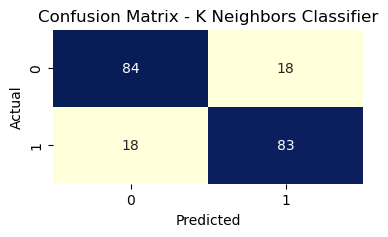

In [72]:
#K Neighbour Classifier with Hyperparameter Tuning

# Define the parameter grid
param_grid = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

# Create the K Neighbors Classifier
KN = KNeighborsClassifier()

# Create the grid search object
grid_search = GridSearchCV(KN, param_grid, cv=5)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Create the K Neighbors Classifier with the best parameters
best_KN = KNeighborsClassifier(**best_params)

# Fit the model on the training data
best_KN.fit(X_train, y_train)

# Make predictions on the test set
KN_y_pred = best_KN.predict(X_test)

print("K Neighbors Classifier with Hyperparameter Tuning:")
# Classification Report
print("Classification Report:")
print(classification_report(y_test, KN_y_pred))


# Cross-Validation Score
scores = cross_val_score(best_KN, X, y, cv=5)
print("Cross-Validation Scores:", scores)
mean_score = scores.mean()
print("Mean Cross-Validation Score:", mean_score)

# Plot confusion matrix as a heatmap
cm = confusion_matrix(y_test, KN_y_pred)
plt.figure(figsize=(4, 2))
sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu", cbar=False)
plt.title("Confusion Matrix - K Neighbors Classifier")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

ROC AUC Score: 0.8782275286352166


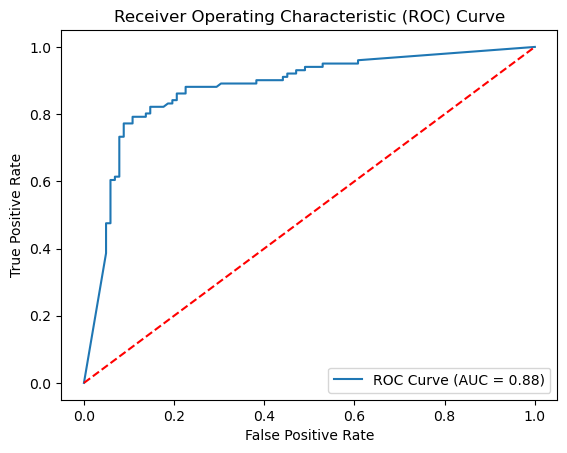

In [73]:
#ROC AUC Curve

y_prob = best_KN.predict_proba(X_test)[:, 1]
auc_score = roc_auc_score(y_test, y_prob)
print("ROC AUC Score:", auc_score)
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(auc_score))
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

Extra Tree Classifier with Hyperparameter Tuning:
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.85      0.84       102
           1       0.85      0.83      0.84       101

    accuracy                           0.84       203
   macro avg       0.84      0.84      0.84       203
weighted avg       0.84      0.84      0.84       203

Cross-Validation Scores: [0.77922078 0.77922078 0.83766234 0.81168831 0.82352941]
Mean Cross-Validation Score: 0.8062643239113827


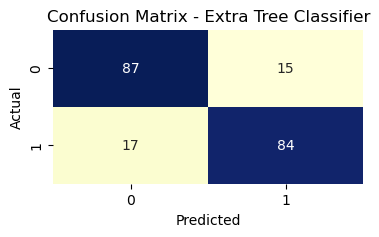

In [74]:
#Extra Tree Classifier with Hyperparameter Tuning


# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

# Create the Extra Trees Classifier
ET = ExtraTreesClassifier()

# Create the grid search object
grid_search = GridSearchCV(ET, param_grid, cv=5)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_


# Create the Extra Trees Classifier with the best parameters
best_ET = ExtraTreesClassifier(**best_params)

# Fit the model on the training data
best_ET.fit(X_train, y_train)

# Make predictions on the test set
ET_y_pred = best_ET.predict(X_test)


print("Extra Tree Classifier with Hyperparameter Tuning:")
# Classification Report
print("Classification Report:")
print(classification_report(y_test, ET_y_pred))

# Cross-Validation Score
scores = cross_val_score(best_ET, X, y, cv=5)
print("Cross-Validation Scores:", scores)
mean_score = scores.mean()
print("Mean Cross-Validation Score:", mean_score)

# Plot confusion matrix as a heatmap
cm = confusion_matrix(y_test, ET_y_pred)
plt.figure(figsize=(4, 2))
sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu", cbar=False)
plt.title("Confusion Matrix - Extra Tree Classifier")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

ROC AUC Score: 0.8844399145796933


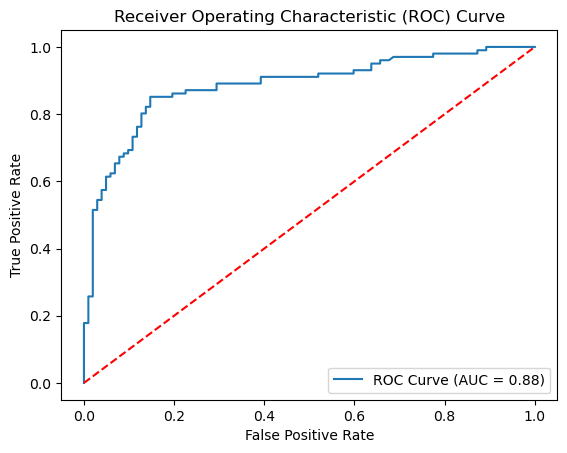

In [76]:
#ROC AUC Curve

y_prob = best_ET.predict_proba(X_test)[:, 1]
auc_score = roc_auc_score(y_test, y_prob)
print("ROC AUC Score:", auc_score)

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(auc_score))
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

Support Vector Classifier with Hyperparameter Tuning:
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.83      0.84       102
           1       0.83      0.85      0.84       101

    accuracy                           0.84       203
   macro avg       0.84      0.84      0.84       203
weighted avg       0.84      0.84      0.84       203

Cross-Validation Scores: [0.77922078 0.76623377 0.81818182 0.83116883 0.83660131]
Mean Cross-Validation Score: 0.8062813003989474


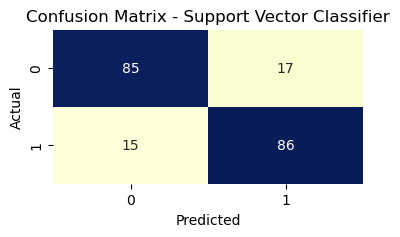

In [77]:
#Support Vector Classifier with Hyperparameter Tuning

# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

# Create the SVC
SV = SVC()

# Create the grid search object
grid_search = GridSearchCV(SV, param_grid, cv=5)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Create the SVC with the best parameters
best_SV = SVC(**best_params)

# Fit the model on the training data
best_SV.fit(X_train, y_train)

# Make predictions on the test set
SV_y_pred = best_SV.predict(X_test)

print("Support Vector Classifier with Hyperparameter Tuning:")
# Classification Report
print("Classification Report:")
print(classification_report(y_test, SV_y_pred))

# Cross-Validation Score
scores = cross_val_score(best_SV, X, y, cv=5)
print("Cross-Validation Scores:", scores)
mean_score = scores.mean()
print("Mean Cross-Validation Score:", mean_score)

# Plot confusion matrix as a heatmap
cm = confusion_matrix(y_test, SV_y_pred)
plt.figure(figsize=(4, 2))
sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu", cbar=False)
plt.title("Confusion Matrix - Support Vector Classifier")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

ROC AUC Score: 0.8650262085032033


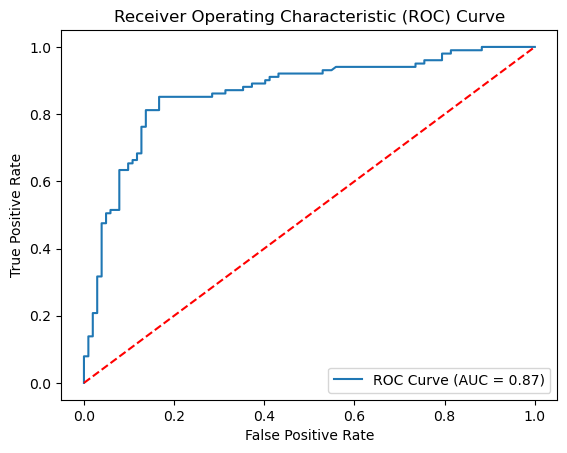

In [78]:
#ROC AUC curve

y_prob = best_SV.decision_function(X_test)

# Compute ROC AUC score
auc_score = roc_auc_score(y_test, y_prob)

print("ROC AUC Score:", auc_score)

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(auc_score))
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

XGBoost Classifier :
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.88      0.86       102
           1       0.87      0.82      0.85       101

    accuracy                           0.85       203
   macro avg       0.85      0.85      0.85       203
weighted avg       0.85      0.85      0.85       203

Cross-Validation Scores: [0.8107089  0.7517911  0.88847375 0.87212778 0.85100914]
Mean Cross-Validation Score: 0.8348221342453549


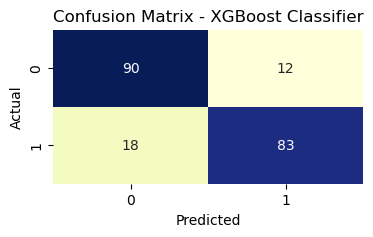

In [79]:
#XGBoost Classifier with Hyperparameter Tuning

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.1, 0.01, 0.001],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Create the XGBoost classifier
XGB = XGBClassifier()

# Create the grid search object
grid_search = GridSearchCV(XGB, param_grid, cv=5)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Create the XGBoost classifier with the best parameters
best_XGB = XGBClassifier(**best_params)

# Fit the model on the training data and make prediction on test data
best_XGB.fit(X_train, y_train)
XGB_y_pred = best_XGB.predict(X_test)

print("XGBoost Classifier :")
# Classification Report
print("Classification Report:")
print(classification_report(y_test, XGB_y_pred))


# Cross-Validation Score
scores = cross_val_score(best_XGB, X, y, cv=5, scoring='roc_auc')
print("Cross-Validation Scores:", scores)
mean_score = scores.mean()
print("Mean Cross-Validation Score:", mean_score)

# Plot confusion matrix as a heatmap
cm = confusion_matrix(y_test, XGB_y_pred)
plt.figure(figsize=(4, 2))
sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu", cbar=False)
plt.title("Confusion Matrix - XGBoost Classifier")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

ROC AUC Score: 0.89341875364007


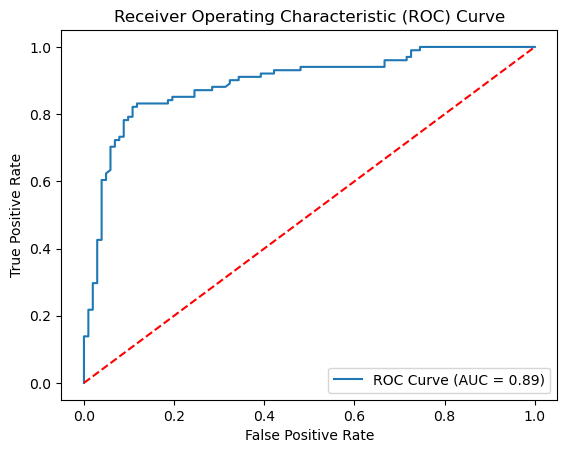

In [80]:
#ROC AUC Curve

y_prob = best_XGB.predict_proba(X_test)[:, 1]

# Compute ROC AUC score
auc_score = roc_auc_score(y_test, y_prob)

print("ROC AUC Score:", auc_score)

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(auc_score))
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [81]:
#Creating DataFrame of All the Models in Their descending Order

# Create a list of model names
model_names = ['Extra Tree Classifier', 'Support Vector Classifier', 'K Neighbour Classifier', 'Random Forest Classifier', 'Decision Tree Classifier', 'Logistic Regression','XGBoost Classifier']

# Create a list of models and their corresponding accuracy scores
models = [ET, SV, KN, RF, dt, LG]
accuracy_scores = [accuracy_score(y_test, ET_y_pred), accuracy_score(y_test, SV_y_pred), accuracy_score(y_test, KN_y_pred), accuracy_score(y_test, RF_y_pred), accuracy_score(y_test, dt_y_pred), accuracy_score(y_test, LG_y_pred),accuracy_score(y_test, XGB_y_pred)]

# Create a dataframe with model name and accuracy score
df = pd.DataFrame({'Model Name': model_names, 'Accuracy Score': accuracy_scores})

# Sort the dataframe by accuracy score in descending order
df = df.sort_values('Accuracy Score', ascending=False)

# Print the dataframe
df.index = range(1, len(df)+1)
print(df)

                  Model Name  Accuracy Score
1         XGBoost Classifier        0.852217
2      Extra Tree Classifier        0.842365
3  Support Vector Classifier        0.842365
4   Random Forest Classifier        0.827586
5     K Neighbour Classifier        0.822660
6   Decision Tree Classifier        0.812808
7        Logistic Regression        0.788177


Observation:
    
    
1. XG boost is giving the Highest Accuracy so considering the same for future model

In [82]:
#Saving Model

filename = 'XGBoost.pkl'
pickle.dump(XGB, open(filename, 'wb'))